## ARIMA and SARIMA
### on Perrin-freres-Monthly-Champagne-sales

### Auto Regressive Integrated Moving Averages
The general process of arima model is the following.
1. Visualize Time Series data
2. Make the time series data stationary.
3. Plot the Correlation and Auto Correlation Charts.
4. Contruct the ARIMA and SARIMA model based on data.
5. Use the model to make predictions.

In [35]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import os

In [36]:
df = pd.read_csv('stocks.csv')
df.head(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [37]:
df.columns = ['Months','Price']
df.head(5)

,Months,Price
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [38]:
df.isnull()

,Months,Price
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
102,False,False
103,False,False
104,False,False
105,True,True


In [39]:
df.drop(105,axis=0,inplace=True)
df.drop(106,axis=0,inplace=True)
df.isnull().sum()

Months    0
Price     0
dtype: int64

In [40]:
df.dtypes

Months     object
Price     float64
dtype: object

In [41]:
df['Months'] = pd.to_datetime(df['Months'])
df.dtypes

Months    datetime64[ns]
Price            float64
dtype: object

In [42]:
df.set_index('Months',inplace=True)
df.head(5)

,Price
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


## 2. Visualize the Data

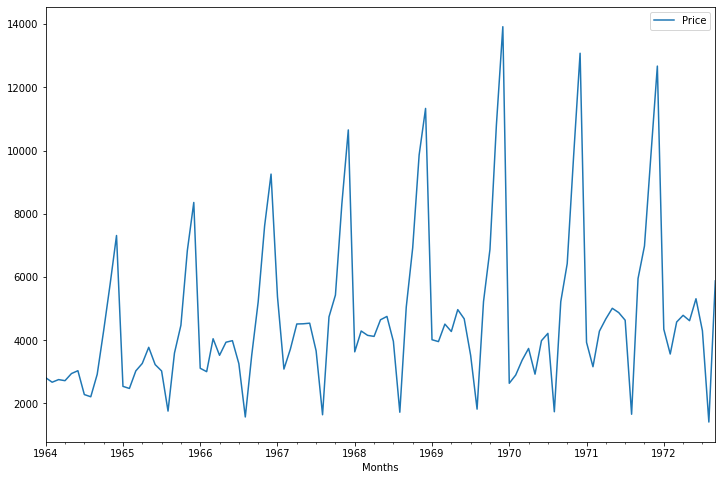

In [43]:
df.plot(figsize= (12,8))

Testing for Stationarity use Dickey Fuller test

In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:
# Accept Null Hpyo means dataset is Not Stationary
# Reject Null Hypo Means dataset is Stationary
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test statistic','p-value','#lags used','Number of Observations']
    for values, label in zip(result,labels):
        print(label +':'+ str(values))
    if(result[1] <= 0.05):
        print("The Dataset is stationary, Reject Null Hypothesis")
    else:
        print("The Dataset is Not Stationary, Accept Null Hypothesis")

In [46]:
adfuller_test(df['Price'])

ADF Test statistic:-1.8335930563276188
p-value:0.363915771660247
#lags used:11
Number of Observations:93
The Dataset is Not Stationary, Accept Null Hypothesis


My p-value is > 0.05 so we accept Null Hypothises and prove that data is Not Stationary

## Differencing

In [47]:
df['Seasonal Price Diff'] = df['Price'] - df['Price'].shift(12)
df

,Price,Seasonal Price Diff
Months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-05-01,4618.0,-392.0
1972-06-01,5312.0,438.0
1972-07-01,4298.0,-335.0


In [48]:
adfuller_test(df['Seasonal Price Diff'].dropna())

ADF Test statistic:-7.626619157213166
p-value:2.0605796968136632e-11
#lags used:0
Number of Observations:92
The Dataset is stationary, Reject Null Hypothesis


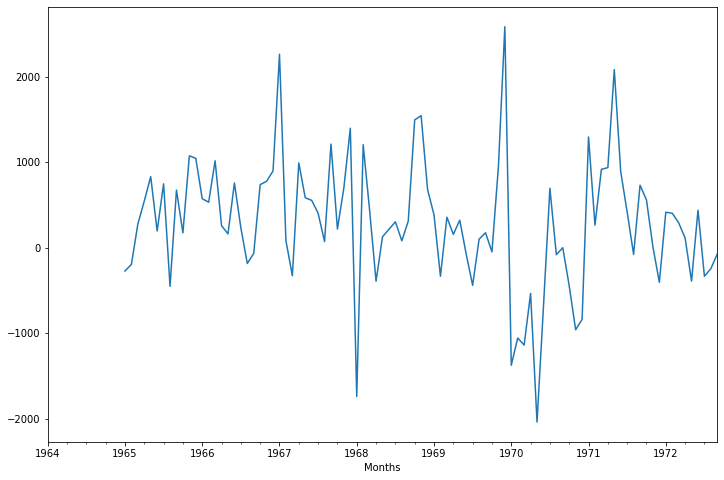

In [49]:
df['Seasonal Price Diff'].plot(figsize=(12,8))

Now This Data Looks stationary

Identify AR model by best score of PACF
shut off phase 
Identify MA model is done by best of ACF rather than PACF
shut iff phase

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

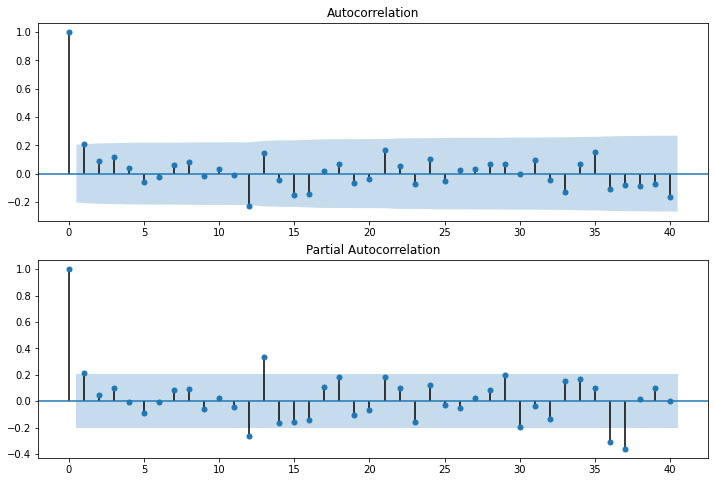

In [52]:
fig =plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal Price Diff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal Price Diff'].iloc[13:],lags= 40,ax=ax2)

Here we need to find three values p,d,q
p = AR model lags
d = differencing /Integrated
q = MA model Lags

In [53]:
# For Non Seasonal Data
#p=1 d=1 q can be 0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [54]:
model = ARIMA(df['Price'],order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [55]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 19 Aug 2022   AIC                           1910.251
Time:                        12:44:16   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7854     12.405      1.837      0.069      -1.528      47.099
ar.L1.D.Price     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Price    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [56]:
df.tail(20)

,Price,Seasonal Price Diff
Months,,
1971-02-01,3162.0,263.0
1971-03-01,4286.0,916.0
1971-04-01,4676.0,936.0
1971-05-01,5010.0,2083.0
1971-06-01,4874.0,888.0
1971-07-01,4633.0,416.0
1971-08-01,1659.0,-79.0
1971-09-01,5951.0,730.0
1971-10-01,6981.0,557.0


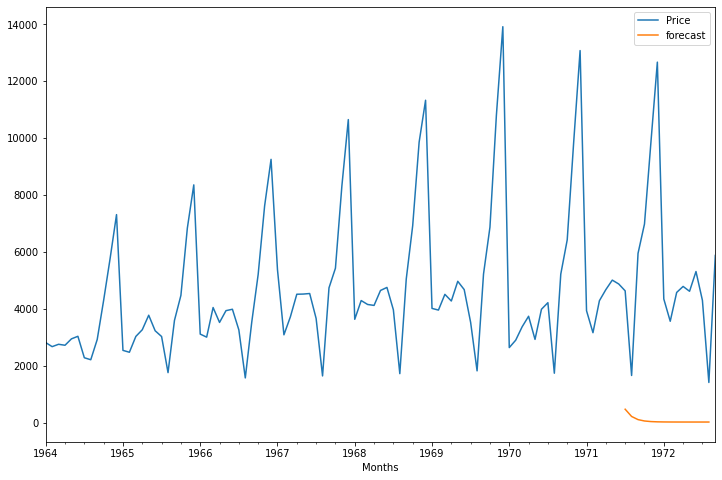

In [57]:
df['forecast'] = model_fit.predict(start=90,end=103,dynamic=True)
df[['Price','forecast']].plot(figsize=(12,8))

In [58]:
import statsmodels.api as sm

In [59]:
model = sm.tsa.statespace.SARIMAX(df['Price'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


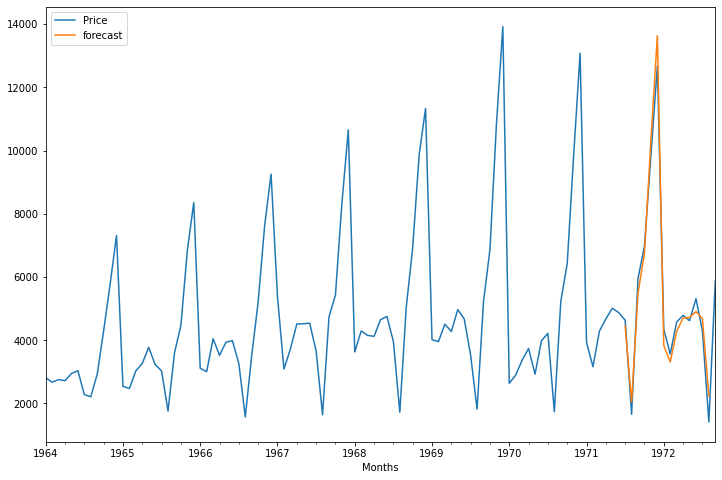

In [60]:
df['forecast'] = results.predict(start=90,end=103,dynamic=True)
df[['Price','forecast']].plot(figsize=(12,8))

Adding Future Dates to the Dataset.

In [61]:
from pandas.tseries.offsets import DateOffset

In [62]:
future_dates = [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [63]:
future_dataset_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [64]:
future_dataset_df.tail(20)

,Price,Seasonal Price Diff,forecast
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN
1973-08-01,NaN,NaN,NaN
1973-09-01,NaN,NaN,NaN
1973-10-01,NaN,NaN,NaN


In [65]:
future_dataset_df.shape

(23, 3)

In [66]:
future_df = pd.concat([df,future_dataset_df])

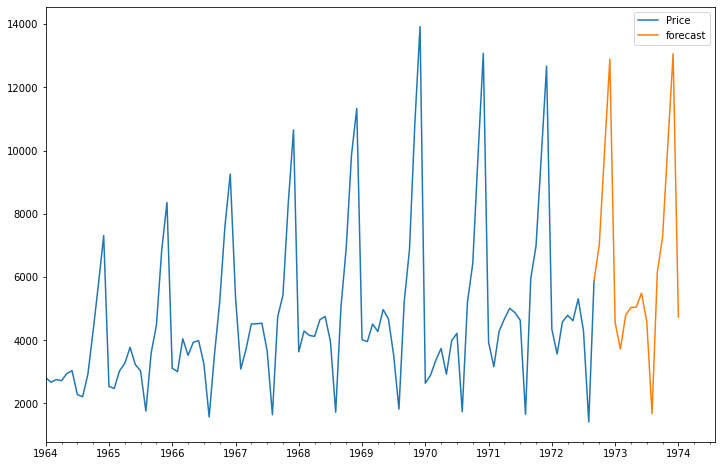

In [68]:
future_df['forecast'] = results.predict(start=104,end=120,dynamic=True)
future_df[['Price','forecast']].plot(figsize=(12,8))

In [70]:
from sklearn.metrics import mean_absolute_percentage_error

In [80]:
new_stock=future_df

In [85]:
new_stock.to_csv('new_stock.csv', index = False, encoding='utf-8') # False: not include index
print(df)

             Price  Seasonal Price Diff     forecast
Months                                              
1964-01-01  2815.0                  NaN          NaN
1964-02-01  2672.0                  NaN          NaN
1964-03-01  2755.0                  NaN          NaN
1964-04-01  2721.0                  NaN          NaN
1964-05-01  2946.0                  NaN          NaN
...            ...                  ...          ...
1972-05-01  4618.0               -392.0  4717.511903
1972-06-01  5312.0                438.0  4906.404545
1972-07-01  4298.0               -335.0  4685.437399
1972-08-01  1413.0               -246.0  2232.408971
1972-09-01  5877.0                -74.0          NaN

[105 rows x 3 columns]


In [98]:
new_stock['Price'].tail(60)

1969-09-01     5222.0
1969-10-01     6872.0
1969-11-01    10803.0
1969-12-01    13916.0
1970-01-01     2639.0
1970-02-01     2899.0
1970-03-01     3370.0
1970-04-01     3740.0
1970-05-01     2927.0
1970-06-01     3986.0
1970-07-01     4217.0
1970-08-01     1738.0
1970-09-01     5221.0
1970-10-01     6424.0
1970-11-01     9842.0
1970-12-01    13076.0
1971-01-01     3934.0
1971-02-01     3162.0
1971-03-01     4286.0
1971-04-01     4676.0
1971-05-01     5010.0
1971-06-01     4874.0
1971-07-01     4633.0
1971-08-01     1659.0
1971-09-01     5951.0
1971-10-01     6981.0
1971-11-01     9851.0
1971-12-01    12670.0
1972-01-01     4348.0
1972-02-01     3564.0
1972-03-01     4577.0
1972-04-01     4788.0
1972-05-01     4618.0
1972-06-01     5312.0
1972-07-01     4298.0
1972-08-01     1413.0
1972-09-01     5877.0
1972-10-01        NaN
1972-11-01        NaN
1972-12-01        NaN
1973-01-01        NaN
1973-02-01        NaN
1973-03-01        NaN
1973-04-01        NaN
1973-05-01        NaN
1973-06-01

In [117]:
df2=pd.read_csv('act1.csv')

In [118]:
actual=df2['actual']
pred=df2['pred']

In [119]:
mean_absolute_percentage_error(actual, pred)

0.009050269240857623